<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


In [2]:
!python -m pip install --upgrade pip
!python -m pip install seaborn
!python -m pip install scipy statsmodels

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.1
    Uninstalling pip-25.1:
      Successfully uninstalled pip-25.1


#### Import the required libraries we need for the lab.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston = pd.read_csv(URL)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
import matplotlib.pyplot as plt

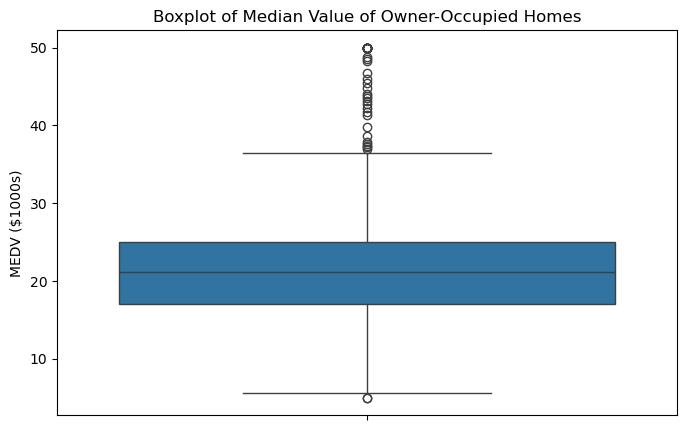

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=boston['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('MEDV ($1000s)')
plt.show()

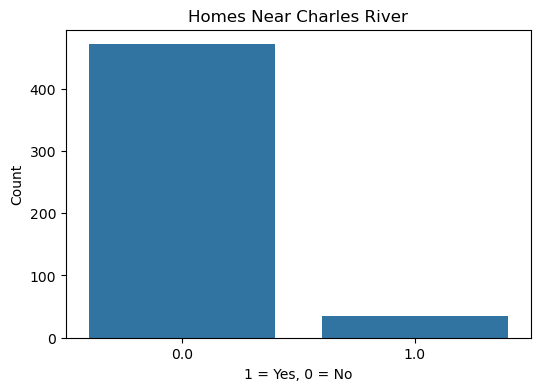

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston)
plt.title('Homes Near Charles River')
plt.xlabel('1 = Yes, 0 = No')
plt.ylabel('Count')
plt.show()

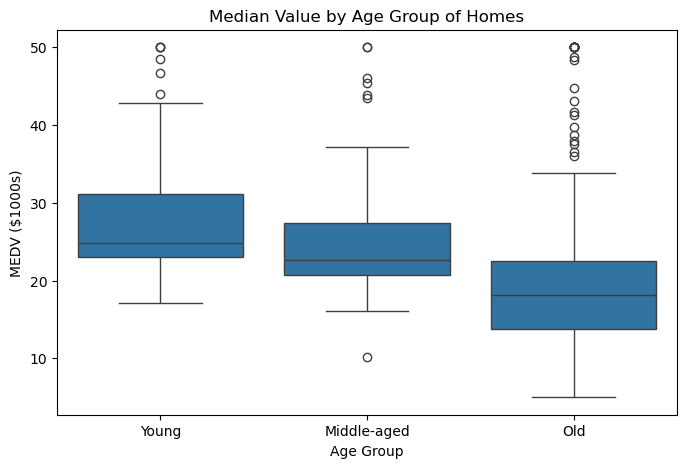

In [9]:
boston['AGE_group'] = pd.cut(boston['AGE'], bins=[0, 35, 70, 100], labels=['Young', 'Middle-aged', 'Old'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_group', y='MEDV', data=boston)
plt.title('Median Value by Age Group of Homes')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

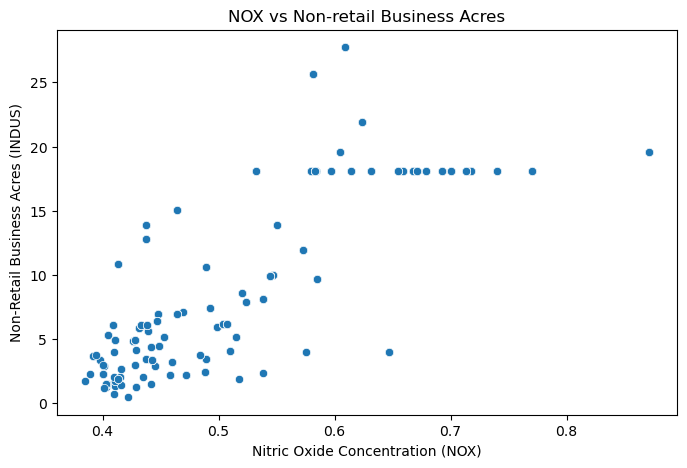

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NOX', y='INDUS', data=boston)
plt.title('NOX vs Non-retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Non-Retail Business Acres (INDUS)')
plt.show()

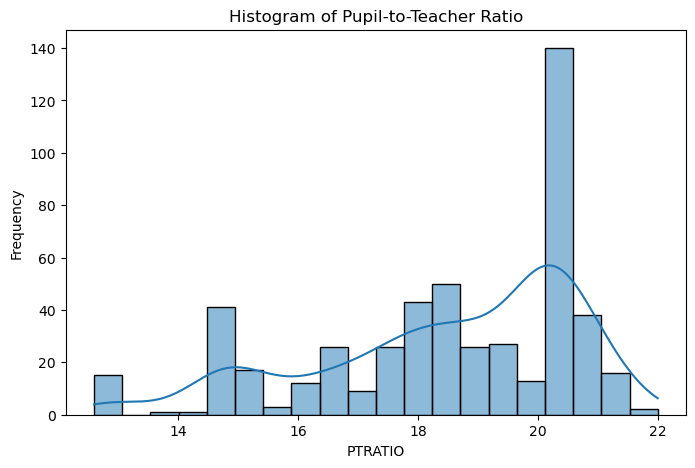

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(boston['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

In [13]:
from scipy import stats

In [14]:
#three statistical test 
#T-test: MED vs CHAS
river = boston[boston['CHAS'] == 1]['MEDV']
not_river = boston[boston['CHAS'] == 0]['MEDV']

t_stat, p_val = stats.ttest_ind(river, not_river)
print("T-test result:", t_stat, "P-value:", p_val)
#yes there is a statistically significant difference because a low p-value indicates a very low probability which means the observed difference
#in median home values between houses near or far from the river is due to random chance. This means the location has a real effect on home values 

T-test result: 3.996437466090509 P-value: 7.390623170519905e-05


In [15]:
#ANONVA:MEDV by Age_group 
model = ols('MEDV ~ C(AGE_group)', data=boston).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
#the tiny p-value shows that mean house prices across age groups are not all equal so that shows the true difference in value

                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


In [16]:
#Pearson Correlation:NOX and INDUS
corr_coef, p_val = stats.pearsonr(boston['NOX'], boston['INDUS'])
print("Correlation coefficient:", corr_coef, "P-value:", p_val)
#due to the low p-value there is a real strong positive linear relationship between the proportion of industrial land and NOX pollution 

Correlation coefficient: 0.763651446920915 P-value: 7.913361061241167e-98


In [17]:
#Linear Regression:DIS impace on MEDV
X = sm.add_constant(boston['DIS'])  # Add intercept
y = boston['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())
#the regression cinfirms that as distance to employment centwes increases so do median home values and the p-value tells us this relationship 
#is not due to chance 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        14:38:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0